    NAMA : JUMIATI
    NIM  : 09011181924145
    KELAS: SK5 REGULER 2019
    TUGAS: PROJEK ARTIFICIAL INTELLIGENCE

# KLASIFIKASI WAJAH UNTUK INTERPRETASI JENIS KELAMIN MENGGUNAKAN METODE CONVOLUTIONAL NEURAL NETWORK (CNN)

Program ini dibuat untuk memenuhi tugas projek mata kuliah Artificial Intelligence (AI). Program ini hanya sebatas memprediksi apakah seseorang tergolong sebagai pria atau wanita berdasarkan gambar wajah yang diinputkan. 

Saya mengambil data gambar dari UTKFace, yang tersedia pada link berikut https://www.kaggle.com/jangedoo/utkface-new. Dataset UTKFace adalah dataset wajah berskala besar dengan rentang usia yang panjang (berkisar dari 0 hingga 116 tahun). Dataset terdiri dari >20.000 gambar wajah dengan anotasi usia, jenis kelamin, dan etnis. Gambar mencakup variasi besar dalam pose, ekspresi wajah, iluminasi, oklusi, resolusi, dll. Dataset ini dapat digunakan pada berbagai tugas, misalnya, deteksi wajah, estimasi usia, perkembangan/regresi usia, lokalisasi tengara, dll.

Sedangkan metode yang saya gunakan untuk mengolah data tersebut adalah Convolutional Neural Network (CNN). Convolutional Neural Network (CNN) merupakan salah satu metode yang terdapat dalam Deep Learning yang banyak digunakan untuk menyelesaikan permasalahan yang berkaitan dengan object detection dan image classification.

# PENJELASAN SOURCE CODE

## Import Library

Ada beberapa library yang digunakan dalam mendukung kelancaran jalannya program ini. 
- os = berfungsi untuk path atau memanggil alamat folder.
- numpy = memiliki kegunaan untuk operasi vektor dan matriks.
- keras = menyediakan interface untuk library TensorFlow dan menawarkan utilitas untuk mengkompilasi model.
- cv2 = memanggil modul opencv untuk proses input, simpan dan menampilkan citra/image.
- imageio = menyediakan antarmuka yang mudah untuk membaca dan menulis berbagai data gambar.

In [1]:
import os
import numpy as np
from keras.utils.np_utils import to_categorical
import cv2
import imageio

## Inisialisasi Variabel

Mendefinisikan variabel images dan labels bertipe data list.

In [2]:
images = []
labels = []

## Import New Library

Library patoolib digunakan untuk mengekstrak file dataset yang dibungkus dengan format rar.

In [3]:
import patoolib
patoolib.extract_archive("Dataset_Image/UTKFace.rar")

patool: Extracting Dataset_Image/UTKFace.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- C:\Users\Acer\Dataset_Image\UTKFace.rar
patool:     with cwd=.\Unpack_bs6ph11f
patool: ... Dataset_Image/UTKFace.rar extracted to `UTKFace4' (local file exists).


'UTKFace4'

## Memanggil Dataset

File gambar yang ada pada direktori UTKFace akan diwakili oleh variabel DIREKTORI. Method python listdir() mengembalikan daftar yang berisi nama-nama entri dalam direktori yang diberikan oleh path.
- Variabel path mengarahkan letak setiap gambar yang ada di dalam folder UTKFace.
- Variabel gender memberikan petunjuk apakah gambar di labeli dengan jenis kelamin pria (0) atau wanita (1).
- Variabel face digunakan untuk mengatur ukuran panjang dan lebar setiap gambar menjadi 85x85 pixel.
- Variabel list image menampung gambar sebanyak 23.708 data.
- Variabel list labels menampung klasifikasi jenis kelamin dari setiap gambar yang ada pada variabel list image.

In [4]:
DIRECTORY = "UTKFace/"
for image in os.listdir(DIRECTORY):
  path = DIRECTORY+image
  gender = path.split('/')[-1].split('_')[1]
  face = imageio.imread(path)
  face = cv2.resize(face, (85, 85))
  images.append(face)
  labels.append(int(gender))

## Jumlah Image

In [5]:
print("X : ", len(images))
print("Y : ", len(labels))

X :  23708
Y :  23708


## Copast Variabel images dan labels

Membuat variabel baru, yaitu variabel X dengan tipe data array (menyalin isi dari variabel images) dan variabel Y dengan tipe data array (menyalin isi dari variabel labels).

In [6]:
X = np.array(images)
Y = np.array(labels)

X = X.astype('float32')

## Shape

shape dapat membantu dalam menemukan dimensi array. Ini mengembalikan bentuk dalam bentuk tupel karena kita tidak dapat mengubah tupel seperti kita tidak dapat mengubah dimensi array.

In [7]:
X[0].shape

(85, 85, 3)

Diketahui dari output shape yang terlihat bahwa keseluruhan gambar mempunyai size 85 x 85 pixels, dimana lebar (width) sebesar 85 pixel, tinggi (height) sebesar 85 pixel dan frame total sebesar 3 yang menunjukan channel RGB (Red, Green, Blue).

In [8]:
X_data = np.squeeze(X)
X_data.shape

(23708, 85, 85, 3)

In [9]:
X_data /= 255

In [10]:
Y_data = to_categorical(Y, num_classes=2)

## Train / Test Split

Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu.

Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

In [11]:
from sklearn.model_selection import train_test_split

Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

Karena data testing tidak digunakan untuk melatih model, maka model tidak mengetahui outcome dari data tersebut. Ini yang disebut dengan out-of-sample testing.

Suatu model dikatakan bagus jika memiliki akurasi yang tinggi atau bagus untuk data out-of-sample, karena tujuan utama dibuatnya sebuah model tentunya adalah untuk memprediksi dengan benar data yang belum diketahui outcome-nya.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

## Jumlah Data Train

In [13]:
print(X_train.shape)

(18966, 85, 85, 3)


In [14]:
print(y_train.shape)

(18966, 2)


## Jumlah Data Test

In [15]:
print(X_test.shape)

(4742, 85, 85, 3)


In [16]:
print(y_test.shape)

(4742, 2)


## Import New Library

Tensorflow merupakan sebuah library untuk Machine Learning yang dapat digunakan untuk melakukan berbagai macam tugas namun Tensorflow lebih berfokus pada Training, Interfacing dan Deep Neural Network. Packages keras dan tensorflow digunakan untuk menentukan model dataset dan pengaruh data test terhadap tingkat akurasi.

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Hidden Layers dan Proses pada CNN

Perhatikan gambar berikut, lihat proses yang terjadi pada hidden layers.
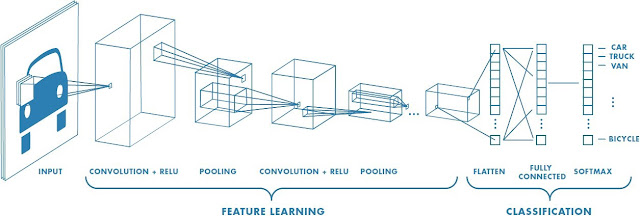

Berikut hidden layer dan proses pada CNN:
- Convolutional layers + ReLu Layers
Tujuan dari convolutional layers adalah mengidentifikasi dan mengekstrak features dari sebuah image dengan menggunakan filter, sering disebut juga kernel atau feature detector. ‘ReLU’ singkatan dari ‘Rectified Linear Unit’. Tujuan dari ReLU layer adalah untuk menghadirkan non-linearity pada neural network, agar dapat menangani data yang kompleks.


- Pooling Layers
Pooling layer berfungsi untuk mengurangi spatial size dari feature map (convolved feature), dimana akan berefek dalam mengurangi beban proses komputasi. Pooling layers sangat bermanfaat dalam mengekstrak dominant features, tanpa tergantung dengan posisi feature pada image.


- Flattening Process
Flattening adalah proses mengubah matrix dari layer pooling menjadi vector satu dimensi.


- Fully Connected Layers
Pada fully connected layer, setiap node menerima input dari semua node dari layer sebelumnya, yaitu setelah proses
flattening. Disini semua hasil ekstrasi features yang dilakukan oleh convolutional neural network digabungkan. Yang berarti Komputer “melihat” image secara utuh— yang bertujuan untuk menghasilkan output yang akurat. Sama seperti pada ANN, disini juga dilakukan Backpropagation untuk setiap iterasi training. Setelah sekian epochs, model dapat membedakan antara feature dominan dan feature non dominan pada images dan melakukan klasifikasi menggunakan Softmax Classification technique.


## Membentuk Model CNN

Codingan berikut merupakan implementasi dari proses yang terjadi pada hidden layers.

Pada syntax pembentukan model, dibuat suatu layer convo pertama dengan 2 dimensi dari size 16 x 16 pixels dimana aktivasi fungsi yaitu relu dan input shape 85 x 85 pixels dengan frame total sebesar 3 yang menunjukan channel RGB (Red, Green, Blue). Kemudian dilanjutkan dengan pembuatan layer max pooling.

Pembuatan layer convo dan max pooling dilakukan berulang sebanyak 4 kali dengan tiap layer memiliki size pixel yang berbeda (lihat code di bawah).

Pembuatan layer dropout, layer flatten dan layer dense sampai dengan proses pembuatan keakuratan (accuracy) dari suatu klasifikasi merupakan proses dari pembuatan jaringan saraf tiruan (deep learning) untuk model convolutional neural network.

In [18]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(85, 85, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

## Model Summary

Hasil output di bawah merupakan model yang akan dimasukkan ke dalam rumus output shape sehingga dapat diketahui output shape dari setiap layer. Total dari parameter yang akan dikerjakan oleh deep learning adalah 3,300,442 perhitungan.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       7

## Model Compile

Pada proses ini kita meyusun model menjadi siap dilakukan proses training. Dimana variabel yang digunakan adalah-
sebagai berikut:
- loss = adalah metode pengukuran nilai loss berdasarkan pada nilai apa. Karena data klasifikasi hanya terdiri dari 2 kelas, maka pada nilai loss ini menggunakan binary loss.
- Optimizer = merupakan metode optimasi yang digunakan.
- Metrics = Nilai matriks yang diukur pada project ini menggunakan nilai akurasi sebagai nilai pengukurannya.

In [20]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Model Fit

Model fit merupakan proes penentuan model dari data training untuk mengetahui nilai keakuratan dari data testing. Penentuan model ini menggunakan bantuan “epochs” yang berfungsi sebagai perulangan model dalam menentukan keakuratan (acc) dan kesalahan (loss). Dilakukan perulangan sebanyak 30 kali dengan ukuran batch yang akan dieksekusi pada setiap epoch adalah 64.

Berikut hasil yang didapatkan oleh epoch yang terakhir :
- loss: 0.0342 (train data)
- accuracy: 0.9877 (train data)
- val_loss: 0.5032 (test data)
- val_accuracy: 0.9038 (test data)

Terdapat selisih 0.469 untuk loss antara hasil training dan testing data dan 0.0839 untuk selisih akurasinya.

In [21]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=30,
         validation_data=(X_test, y_test),)

Epoch 1/30
297/297 [==============================] - 70s 234ms/step - loss: 0.4881 - accuracy: 0.7567 - val_loss: 0.3118 - val_accuracy: 0.8648
Epoch 2/30
297/297 [==============================] - 68s 227ms/step - loss: 0.3068 - accuracy: 0.8663 - val_loss: 0.2625 - val_accuracy: 0.8851
Epoch 3/30
297/297 [==============================] - 67s 225ms/step - loss: 0.2635 - accuracy: 0.8864 - val_loss: 0.2610 - val_accuracy: 0.8838
Epoch 4/30
297/297 [==============================] - 69s 232ms/step - loss: 0.2465 - accuracy: 0.8940 - val_loss: 0.2373 - val_accuracy: 0.8965
Epoch 5/30
297/297 [==============================] - 75s 253ms/step - loss: 0.2202 - accuracy: 0.9054 - val_loss: 0.2570 - val_accuracy: 0.8927
Epoch 6/30
297/297 [==============================] - 71s 240ms/step - loss: 0.2095 - accuracy: 0.9099 - val_loss: 0.2479 - val_accuracy: 0.8910
Epoch 7/30
297/297 [==============================] - 70s 237ms/step - loss: 0.1962 - accuracy: 0.9193 - val_loss: 0.2416 - val_ac

## Evaluasi Model pada Data Testing

Perhitungan nilai akurasi data testing yang didapatkan dari hasil model yang telah dibuat sebelumnya adalah sebesar 0.9038.

In [22]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.903838038444519


## Representasi Index

Karena klasifikasi terdiri dari dua kelas yang disimbolkan dengan angka 0 dan 1, maka angka 0 merepresentasikan jenis kelamin pria dan angka 1 merepresentasikan jenis kelamin wanita.

In [23]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]
print('Male ->', '0', '\nFemale ->', '1')

Male -> 0 
Female -> 1


## Import New Library

Library matplotlib.pyplot digunakan untuk menampilkan output seperti pada gambar di bawah.

In [24]:
import matplotlib.pyplot as plt

## Output Model Prediksi pada Data Testing

Berdasarkan hasil dari model yang telah dibuat sebelumnya, berikut ini merupakan hasil prediksi yang akan dilakukan pada data testing. Objek dipilih secara random dari data testing sebanyak 15 gambar, dengan susunan 3 baris dan 5 kolom.

Jika hasil index prediksi sama dengan index yang telah ditetapkan sebelumnya (label pada gambar), maka output tulisan berwarna hijau. Jika berbeda maka output berwarna merah.

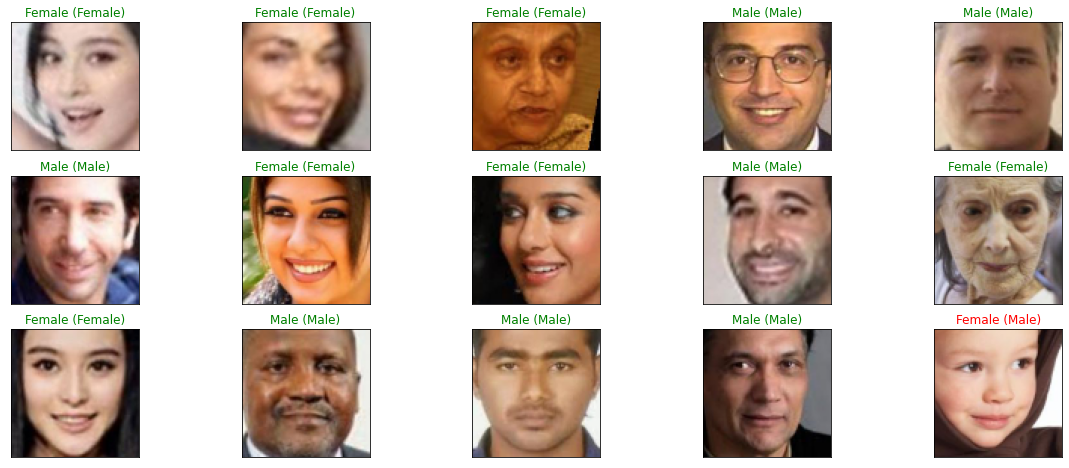

In [25]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

Perhatikan gambar ke-15, hasil prediksi menyatakan bahwasannya dia adalah wanita, padahal orang tersebut adalah pria. Hal ini dapat saja terjadi karena hasil akurasi tidak sampai mendekati 100%, yaitu hanya sebesar 90,38%.